In [57]:
# importing libraries
from itertools import chain
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
import matplotlib as mp
import random
from tqdm import tqdm # for progress bar
import tensorflow as tf
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense, Input, Concatenate, Activation
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
import pandas as pd
import glob
from sklearn.model_selection import train_test_split

# Library for Transfer Learning
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

print("Importing libraries completed.")

Importing libraries completed.


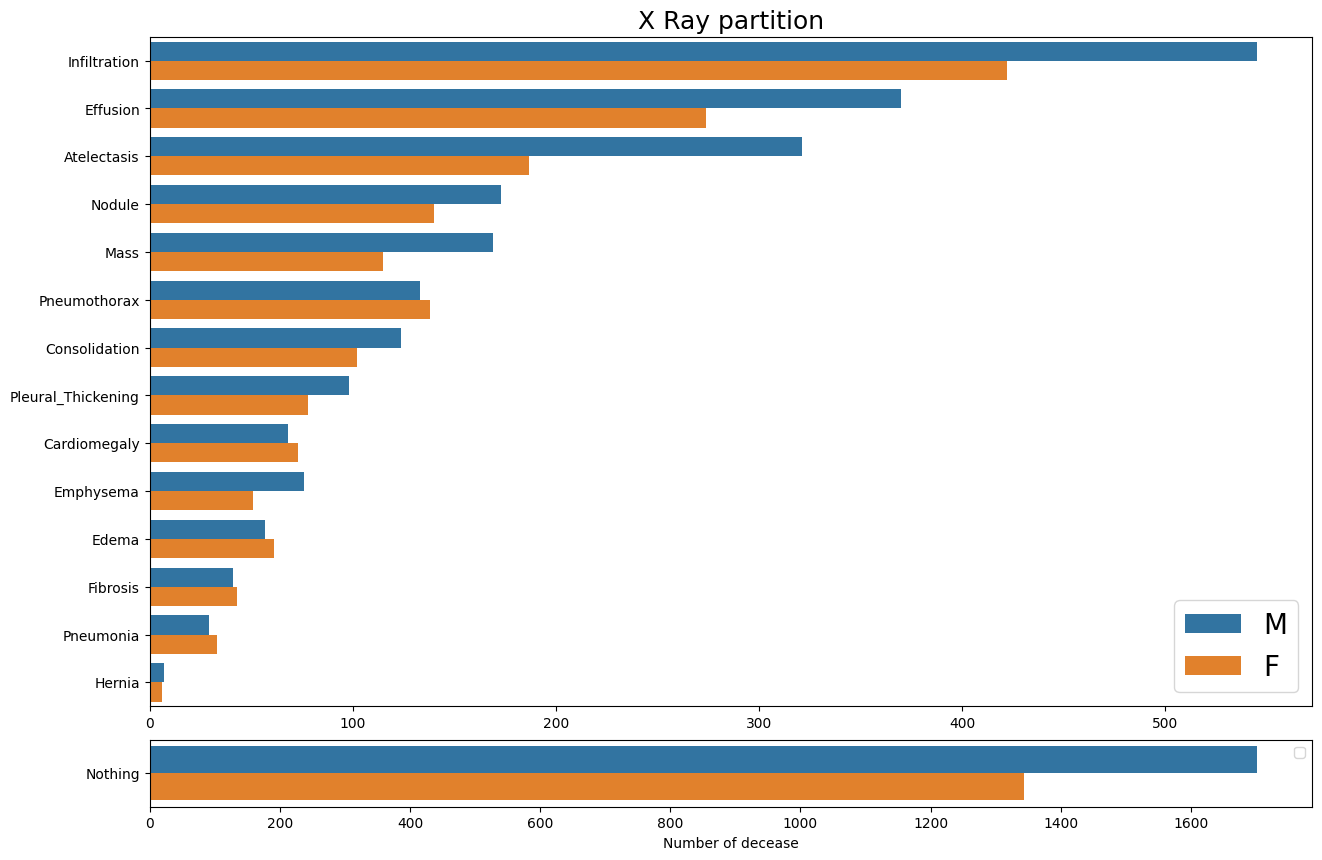

In [16]:
label_df = pd.read_csv('/Users/a080528/Downloads/chest-xray/sample_labels.csv')
label_df = label_df[['Image Index','Finding Labels','Follow-up #','Patient ID','Patient Age','Patient Gender']]
pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']
for pathology in pathology_list :
    label_df[pathology] = label_df['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)
#remove Y after age
label_df['Age']=label_df['Patient Age'].apply(lambda x: x[:-1]).astype(int)

plt.figure(figsize=(15,10))
gs = mp.gridspec.GridSpec(8,1)
ax1 = plt.subplot(gs[:7, :])
ax2 = plt.subplot(gs[7, :])
data1 = pd.melt(label_df,
             id_vars=['Patient Gender'],
             value_vars = list(pathology_list),
             var_name = 'Category',
             value_name = 'Count')
data1 = data1.loc[data1.Count>0]
g=sns.countplot(y='Category',hue='Patient Gender',data=data1, ax=ax1, order = data1['Category'].value_counts().index)
ax1.set( ylabel="",xlabel="")
ax1.legend(fontsize=20)
ax1.set_title('X Ray partition',fontsize=18);

label_df['Nothing']=label_df['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)

data2 = pd.melt(label_df,
             id_vars=['Patient Gender'],
             value_vars = list(['Nothing']),
             var_name = 'Category',
             value_name = 'Count')
data2 = data2.loc[data2.Count>0]
g=sns.countplot(y='Category',hue='Patient Gender',data=data2,ax=ax2)
ax2.set( ylabel="",xlabel="Number of decease")
ax2.legend('')
plt.subplots_adjust(hspace=.5)

In [259]:
images = glob.glob('/Users/a080528/Downloads/chest-xray/images/*.png')

def proc_images(w, h):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    NoFinding = "No Finding" #0
    Consolidation="Consolidation" #1
    Infiltration="Infiltration" #2
    Pneumothorax="Pneumothorax" #3
    Edema="Edema" # 7
    Emphysema="Emphysema" #7
    Fibrosis="Fibrosis" #7
    Effusion="Effusion" #4
    Pneumonia="Pneumonia" #7
    Pleural_Thickening="Pleural_Thickening" #7
    Cardiomegaly="Cardiomegaly" #7
    NoduleMass="Nodule" #5
    Hernia="Hernia" #7
    Atelectasis="Atelectasis"  #6 
    RareClass = ["Edema", "Emphysema", "Fibrosis", "Pneumonia", "Pleural_Thickening", "Cardiomegaly","Hernia"]
    x = [] # images as arrays
    y = [] # labels
    WIDTH = w
    HEIGHT = h
    for img in images:
        base = os.path.basename(img)
        # Read and resize image
        full_size_image = cv2.imread(img)
        finding = label_df["Finding Labels"][label_df["Image Index"] == base].values[0]
        symbol = "|"
        if symbol in finding:
            continue
        else:
            if NoFinding in finding:
                finding = 0
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))      
            elif Consolidation in finding:
                finding = 1
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Infiltration in finding:
                finding = 2
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Pneumothorax in finding:
                finding = 3
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Edema in finding:
                finding = 7
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Emphysema in finding:
                finding = 7
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Fibrosis in finding:
                finding = 7
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Effusion in finding:
                finding = 4
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Pneumonia in finding:
                finding = 7
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Pleural_Thickening in finding:
                finding = 7
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Cardiomegaly in finding:
                finding = 7
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif NoduleMass in finding:
                finding = 5
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Hernia in finding:
                finding = 7
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Atelectasis in finding:
                finding = 6
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            else:
                continue

    return x,y

In [281]:
X,Dy = proc_images(w = 128, h = 128)
df = pd.DataFrame()
df["images"]=X
df["labels"]=Dy
print(len(df), df.images[0].shape)

4527 (128, 128, 3)


In [282]:
from collections import Counter
Counter(sorted(Dy))

Counter({0: 3044, 2: 503, 7: 255, 4: 203, 6: 192, 5: 144, 3: 114, 1: 72})

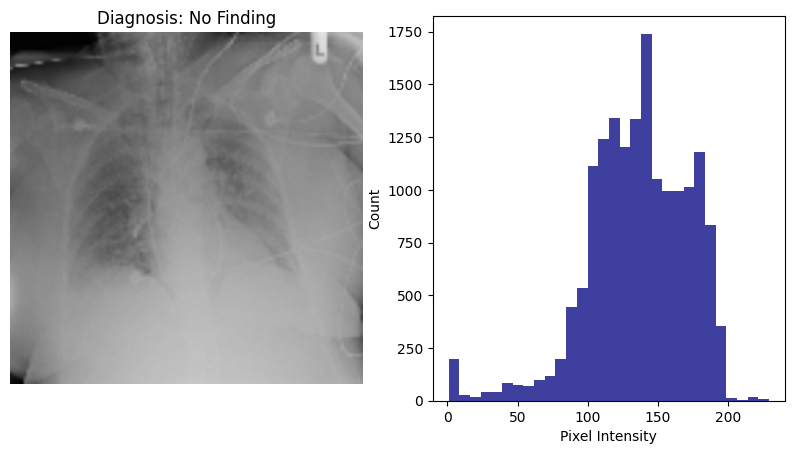

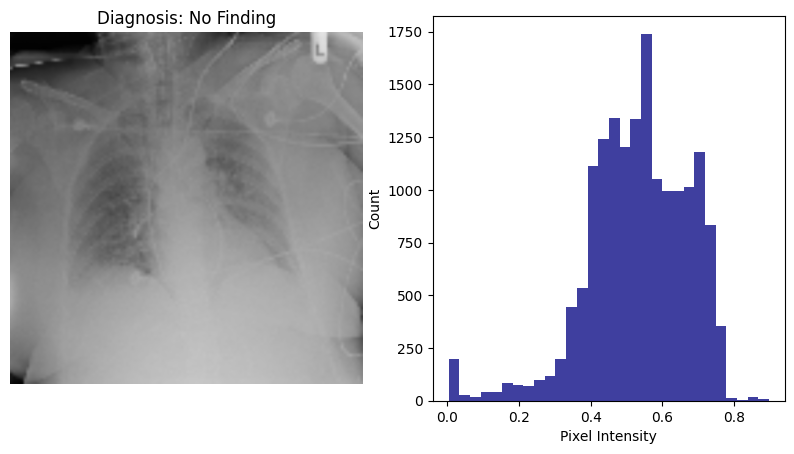

In [283]:
dict_characters = {0: 'No Finding',1: 'Consolidation', 2: 'Infiltration', 
        3: 'Pneumothorax', 4:'Effusion', 5: 'Nodule Mass', 6: 'Atelectasis', 7: "Other Rare Classes"}

def plotHistogram(a, b):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title('Diagnosis: '+ dict_characters[b])
    b = cv2.resize(a, (512,512))
    plt.imshow(b)
    plt.axis('off')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);

    
plotHistogram(X[3], Dy[3])
# Down-scale
X = np.array(X)
DX = X/255.0
plotHistogram(DX[3], Dy[3])

In [284]:
def sample_data_ind(X, y, num1, size1, num2, size2):
    y = np.array(y)
    num1ind = np.where(y == num1)
    num2ind = np.where(y == num2)
    numsind1 = np.random.choice(np.where(y == num1)[0], size1)
    numsind2 = np.random.choice(np.where(y == num2)[0], size2)
    numsinds = np.concatenate([numsind1, numsind2])
    np.random.shuffle(numsinds)
    sx = X[numsinds]
    sy = y[numsinds]

    sy[sy == num1] = 0
    sy[sy == num2] = 1
    
    return sx, sy

In [285]:
ts, ty = sample_data_ind(DX, Dy, 0, 500, 2, 500)
X_train, X_test, Y_train, Y_test = train_test_split(ts, ty, test_size=0.2)

test_images=[]
test_images=X_test
test_images_Original=[]
test_images_Original=X_test
test_image_label=[] # to store the labels of the images
test_image_label=Y_test

val_images=[]
val_images=X_test
val_images_Original=[]
val_images_Original=X_test
val_image_label=[] # to store the labels of the images
val_image_label=Y_test # to store the labels of the images

print("Preparing Dataset Completed.")

Preparing Dataset Completed.


In [286]:
# Training Dataset
print("Training Dataset")

x=np.array(X_train) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(Y_train) # onehot encoding of the labels
# print(y)
print(y.shape)

# Test Dataset
print("Test Dataset")

test_images=np.array(test_images) 
print(test_images.shape)

test_image_label=to_categorical(test_image_label) # onehot encoding of the labels)
print(test_image_label.shape)

# Validation Dataset
print("Validation Dataset")

val_images=np.array(val_images) 
print(val_images.shape)

val_image_label=to_categorical(val_image_label) # onehot encoding of the labels)
print(val_image_label.shape)

Training Dataset
(800, 128, 128, 3)
(800, 2)
Test Dataset
(200, 128, 128, 3)
(200, 2)
Validation Dataset
(200, 128, 128, 3)
(200, 2)


## Modeling from Transfer Learning

In [287]:
# Check properties of the model that we are going to use for Transfer Learning

print("Summary of default VGG16 model.\n")

# we are using VGG16 for transfer learnin here. So we have imported it
from tensorflow.keras.applications import VGG16

# initializing model with weights='imagenet'i.e. we are carring its original weights
model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)

Summary of default VGG16 model.



## Original VGG

In [289]:
# Modelling WITH Transfer Learning

# Here we will prepare model as per our requirements

print("Summary of Custom VGG16 model.\n")
print("1) We setup input layer and 2) We removed top (last) layer. \n")

# let us prepare our input_layer to pass our image size. default is (224,224,3). we will change it to (224,224,3)
input_layer=layers.Input(shape=(128,128,3))

# initialize the transfer model VGG16 with appropriate properties per our need.
# we are passing paramers as following
# 1) weights='imagenet' - Using this we are carring weights as of original weights.
# 2) input_tensor to pass the VGG16 using input_tensor
# 3) we want to change the last layer so we are not including top layer
model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)

Summary of Custom VGG16 model.

1) We setup input layer and 2) We removed top (last) layer. 



In [290]:
# access the current last layer of the model and add flatten and dense after it

print("Summary of Custom VGG16 model.\n")
print("1) We flatten the last layer and added 1 Dense layer and 1 output layer.\n")

last_layer=model_vgg16.output # we are taking last layer of the model

# Add flatten layer: we are extending Neural Network by adding flattn layer
flatten=layers.Flatten()(last_layer) 

# Add dense layer to the final output layer
output_layer=layers.Dense(2,activation='softmax')(flatten)

# Creating modle with input and output layer
model=models.Model(inputs=input_layer,outputs=output_layer)

# Summarize the model
model.summary()

Summary of Custom VGG16 model.

1) We flatten the last layer and added 1 Dense layer and 1 output layer.



Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │        16,386 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,731,074 (56.19 MB)

 Trainable params: 14,731,074 (56.19 MB)

 Non-trainable params: 0 (0.00 B)

In [291]:
# we will freez all the layers except the last layer
# we are making all the layers intrainable except the last layer
print("We are making all the layers intrainable except the last layer. \n")
for layer in model.layers[:-1]:
    layer.trainable=False
model.summary()

We are making all the layers intrainable except the last layer. 



Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │        16,386 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,731,074 (56.19 MB)

 Trainable params: 16,386 (64.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

## Training for original VGG

In [292]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
print("Model compilation completed.")

Model compilation completed.


In [293]:
history = model.fit(x,y,epochs=5,batch_size=128,verbose=True,validation_data=(test_images,test_image_label))
print("Fitting the model completed.")

Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 32s 5s/step - accuracy: 0.5179 - loss: 0.8029 - val_accuracy: 0.5200 - val_loss: 0.6932
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step - accuracy: 0.5387 - loss: 0.6844 - val_accuracy: 0.4800 - val_loss: 0.7545
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step - accuracy: 0.6427 - loss: 0.6345 - val_accuracy: 0.5750 - val_loss: 0.6607
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 35s 5s/step - accuracy: 0.6908 - loss: 0.5972 - val_accuracy: 0.6200 - val_loss: 0.6607
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 34s 5s/step - accuracy: 0.6910 - loss: 0.5657 - val_accuracy: 0.6050 - val_loss: 0.6447
Fitting the model completed.


In [296]:
#predr = np.empty((400,1))
predm = np.empty((len(test_images),1))
#predv = np.empty((400,1))
for i in range(len(test_images)):
    #predr[i, 0] = (np.argmax(Reduce_VGG_model.predict(test_images[i].reshape(1,48,48,3))[0][:2]))
    predm[i, 0] = (np.argmax(model.predict(test_images[i].reshape(1,128,128,3))[0][:2]))
    #predv[i, 0] = (np.argmax(VGG_model.predict(test_images[i].reshape(1,48,48,3))[0][:2]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━

Wrong prediction on these images


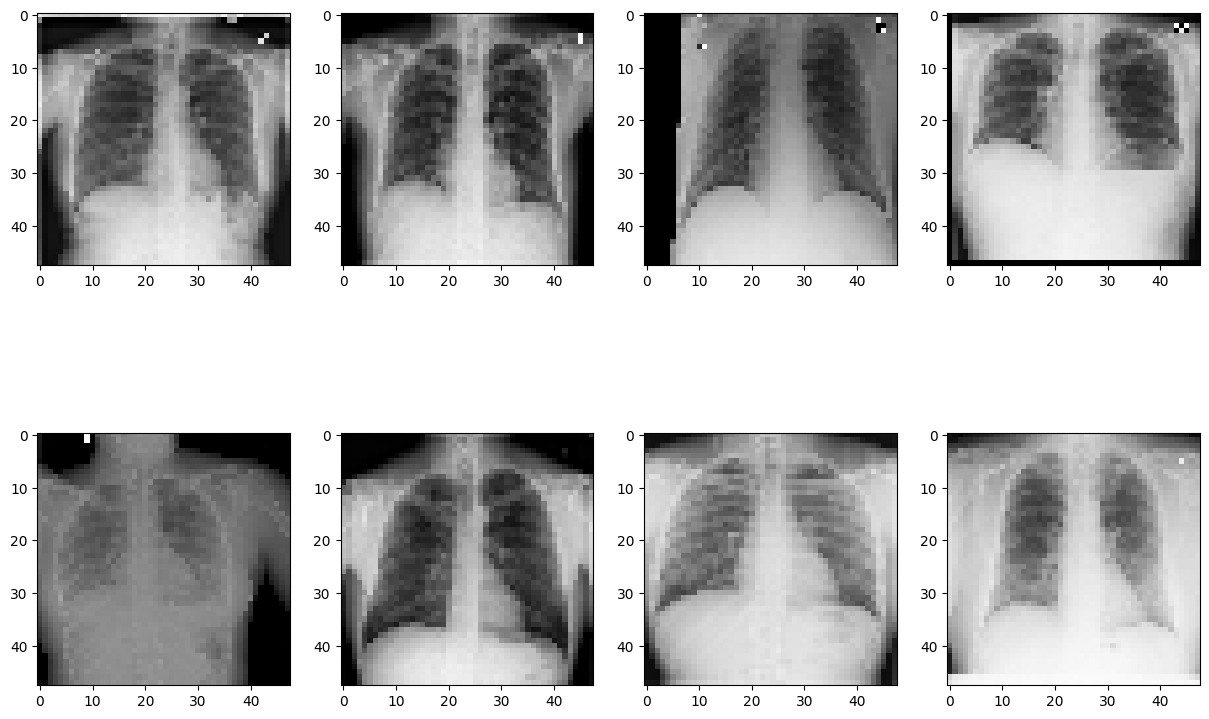

In [167]:
print('Wrong prediction on these images')
plt.figure(figsize = (15,10))
plt.subplot(2,4,1)
plt.imshow(test_images[error_pred[0]])
plt.subplot(2,4,2)
plt.imshow(test_images[error_pred[1]])
plt.subplot(2,4,3)
plt.imshow(test_images[error_pred[2]])
plt.subplot(2,4,4)
plt.imshow(test_images[error_pred[3]])
plt.subplot(2,4,5)
plt.imshow(test_images[health[0]])
plt.subplot(2,4,6)
plt.imshow(test_images[health[1]])
plt.subplot(2,4,7)
plt.imshow(test_images[health[2]])
plt.subplot(2,4,8)
plt.imshow(test_images[health[3]])
plt.show()

## Customized VGG 16 with Categorical Loss

In [168]:
def nnelu(x):
    return tf.add(tf.constant(1, dtype=tf.float32), tf.nn.elu(x))
    
last_layer=model_vgg16.output # we are taking last layer of the model
# Add flatten layer: we are extending Neural Network by adding flattn layer
flatten=layers.Flatten()(last_layer) 

# Add dense layer to the final output layer
reduced_layer=layers.Dense(128,activation='relu')(flatten)

# define the output spare
no_components = 2

output_weight = layers.Dense(no_components, activation='softmax', name = 'weight')(reduced_layer)
output_mu = layers.Dense(no_components, name = 'mu')(reduced_layer)
output_sigma = layers.Dense(no_components, activation= nnelu, name = 'sigma')(reduced_layer)
output_layer = Concatenate()([output_weight, output_mu, output_sigma])


# Creating modle with input and output layer
VGG_model=models.Model(inputs=input_layer,outputs=output_layer)

# Summarize the model
VGG_model.summary()
# we will freez all the layers except the last layer
# we are making all the layers intrainable except the last layer
print("We are making all the layers intrainable except the last layer. \n")
for layer in VGG_model.layers[:-5]:
    layer.trainable=False
VGG_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 48, 48,    │      1,792 │ input_layer_2[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 48, 48,    │     36,928 │ block1_conv1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_pool         │ (None, 24, 24,    │          0 │ block1_conv2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 24, 24,    │     73,856 │ block1_pool[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 24, 24,    │    147,584 │ block2_conv1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 12, 12,    │          0 │ block2_conv2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 12, 12,    │    295,168 │ block2_pool[0][0] │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 12, 12,    │    590,080 │ block3_conv1[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 12, 12,    │    590,080 │ block3_conv2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_pool         │ (None, 6, 6, 256) │          0 │ block3_conv3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv1        │ (None, 6, 6, 512) │  1,180,160 │ block3_pool[0][0] │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv2        │ (None, 6, 6, 512) │  2,359,808 │ block4_conv1[0][… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv3        │ (None, 6, 6, 512) │  2,359,808 │ block4_conv2[0][… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_pool         │ (None, 3, 3, 512) │          0 │ block4_conv3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv1        │ (None, 3, 3, 512) │  2,359,808 │ block4_pool[0][0] │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv2        │ (None, 3, 3, 512) │  2,359,808 │ block5_conv1[0][

 Total params: 14,781,126 (56.39 MB)

 Trainable params: 66,438 (259.52 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

We are making all the layers intrainable except the last layer. 



Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 48, 48,    │      1,792 │ input_layer_2[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 48, 48,    │     36,928 │ block1_conv1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_pool         │ (None, 24, 24,    │          0 │ block1_conv2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 24, 24,    │     73,856 │ block1_pool[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 24, 24,    │    147,584 │ block2_conv1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 12, 12,    │          0 │ block2_conv2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 12, 12,    │    295,168 │ block2_pool[0][0] │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 12, 12,    │    590,080 │ block3_conv1[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 12, 12,    │    590,080 │ block3_conv2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_pool         │ (None, 6, 6, 256) │          0 │ block3_conv3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv1        │ (None, 6, 6, 512) │  1,180,160 │ block3_pool[0][0] │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv2        │ (None, 6, 6, 512) │  2,359,808 │ block4_conv1[0][… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv3        │ (None, 6, 6, 512) │  2,359,808 │ block4_conv2[0][… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_pool         │ (None, 3, 3, 512) │          0 │ block4_conv3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv1        │ (None, 3, 3, 512) │  2,359,808 │ block4_pool[0][0] │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv2        │ (None, 3, 3, 512) │  2,359,808 │ block5_conv1[0][

 Total params: 14,781,126 (56.39 MB)

 Trainable params: 66,438 (259.52 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [169]:
def custom_loss(y_true, par_vec):
    
    w = par_vec[:, :no_components]
    m = par_vec[:, no_components:2*no_components]
    lgs = par_vec[:, 2*no_components:]
    
    weights_pred = tf.nn.softmax(w, axis=-1)
    cce = keras.losses.CategoricalCrossentropy()

    return cce(y_true, weights_pred) 

In [170]:
VGG_model.compile(loss=custom_loss, optimizer='adam',metrics=['accuracy'])
print("Model compilation completed.")

Model compilation completed.


In [171]:
history = VGG_model.fit(x,y,epochs=5,batch_size=128,verbose=True,validation_data=(test_images,test_image_label))
print("Fitting the model completed.")

Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 649ms/step - accuracy: 0.0344 - loss: 0.5023 - val_accuracy: 0.0099 - val_loss: 0.4449
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 646ms/step - accuracy: 0.0108 - loss: 0.4626 - val_accuracy: 0.0028 - val_loss: 0.4449
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 648ms/step - accuracy: 0.0068 - loss: 0.4541 - val_accuracy: 0.0028 - val_loss: 0.4449
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 653ms/step - accuracy: 0.0055 - loss: 0.4510 - val_accuracy: 0.0014 - val_loss: 0.4449
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 656ms/step - accuracy: 0.0065 - loss: 0.4544 - val_accuracy: 0.0014 - val_loss: 0.4449
Fitting the model completed.


In [183]:
predv = np.empty((710,1))
for i in range(710):
    predv[i,0] = (np.argmax(VGG_model.predict(test_images[i].reshape(1,48,48,3))[0][:2]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

## Plot for error prediction

In [222]:
from scipy.stats import norm

spred = VGG_model.predict(test_images[error_pred[0]].reshape(1,48,48,3))[0]
def mix_pdf(x, loc, scale, weights):
    d = np.zeros_like(x)
    for m, s, p in zip(loc, scale, weights):
        d += p * norm.pdf(x, loc = m, scale = s)
    return d

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


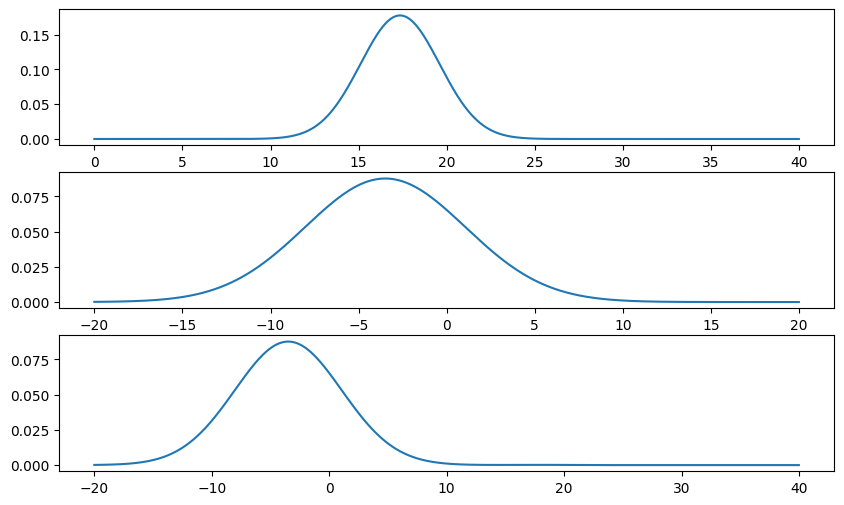

In [237]:
plt.figure(figsize = (10,6))
plt.subplot(3,1,1)
plt.plot(np.arange(0, 40, 0.01), norm.pdf(np.arange(0, 40, 0.01), spred[2], spred[4]))
plt.subplot(3,1,2)
plt.plot(np.arange(-20, 20, 0.01), norm.pdf(np.arange(-20, 20, 0.01), spred[3], spred[5]))
plt.subplot(3,1,3)
ymix = spred[0]*norm.pdf(np.arange(-20, 40, 0.01), spred[2], spred[4]) + spred[1]*norm.pdf(np.arange(-20, 40, 0.01), spred[3], spred[5])
plt.plot(np.arange(-20, 40, 0.01), ymix)
plt.show()

## Customized VGG16 with BIC + Categorical Loss

In [303]:
model_vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [309]:
model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)

last_layer=model_vgg16.output # we are taking last layer of the model
# Add flatten layer: we are extending Neural Network by adding flattn layer
flatten=layers.Flatten()(last_layer) 

# Add dense layer to the final output layer
reduced_feature_space = 50
reduced_feature_layer=layers.Dense(50,activation='relu')(flatten)

# define the output spare
no_components = 2

output_reduce_weight = layers.Dense(no_components, activation='softmax', name = 'weight')(reduced_feature_layer)
output_reduce_mu = layers.Dense(no_components, name = 'mu')(reduced_feature_layer)
output_reduce_sigma = layers.Dense(no_components, activation= nnelu, name = 'sigma')(reduced_feature_layer)

# Constant weight #
weights = tf.constant([0.01]*reduced_feature_space)
weights = tf.reshape(weights, (1,50))
weights = weights[None,0,:]
neuron_weighted = tf.keras.layers.Multiply()([reduced_feature_layer, weights])
toutput = Concatenate()([output_reduce_weight,output_reduce_mu,output_reduce_sigma, neuron_weighted])


# Creating modle with input and output layer
Reduce_VGG_model=models.Model(inputs=input_layer,outputs=toutput)

# we will freez all the layers except the last layer
# we are making all the layers intrainable except the last layer
print("We are making all the layers intrainable except the last layer. \n")
for layer in Reduce_VGG_model.layers[:-6]:
    layer.trainable=False
Reduce_VGG_model.summary()

We are making all the layers intrainable except the last layer. 



Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 128, 128,  │      1,792 │ input_layer_6[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 128, 128,  │     36,928 │ block1_conv1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_pool         │ (None, 64, 64,    │          0 │ block1_conv2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 64, 64,    │     73,856 │ block1_pool[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 64, 64,    │    147,584 │ block2_conv1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 32, 32,    │          0 │ block2_conv2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 32, 32,    │    295,168 │ block2_pool[0][0] │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 32, 32,    │    590,080 │ block3_conv1[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 32, 32,    │    590,080 │ block3_conv2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_pool         │ (None, 16, 16,    │          0 │ block3_conv3[0][… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv1        │ (None, 16, 16,    │  1,180,160 │ block3_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv2        │ (None, 16, 16,    │  2,359,808 │ block4_conv1[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv3        │ (None, 16, 16,    │  2,359,808 │ block4_conv2[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_pool         │ (None, 8, 8, 512) │          0 │ block4_conv3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv1        │ (None, 8, 8, 512) │  2,359,808 │ block4_pool[0][0] │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv2        │ (None, 8, 8, 512) │  2,359,808 │ block5_conv1[0][

 Total params: 15,124,644 (57.70 MB)

 Trainable params: 409,956 (1.56 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [310]:
def custom_loss(y_true, par_vec):

    bs = 1
    w = par_vec[:, :no_components]
    m = par_vec[:, no_components:2*no_components]
    lgs = par_vec[:, 2*no_components:3*no_components]
    prev = par_vec[:, 3*no_components:]
    Lambda = 1e-2
    
    lk = None
    for b in range(bs):
        for c in range(no_components):
            if lk == None:
                lk = (-0.5) * (tf.math.log(2 * np.pi) + 2*lgs[b, c] + tf.square(prev[b,:] - m[b, c]) / (tf.square(tf.exp(lgs[b, c]))+1e-6)) + tf.math.log(w[b, c])
            else:
                lk += (-0.5) * (tf.math.log(2 * np.pi) + 2*lgs[b, c] + tf.square(prev[b,:] - m[b, c]) / (tf.square(tf.exp(lgs[b, c]))+1e-6)) + tf.math.log(w[b, c])

    mlk = tf.reduce_max(lk, axis=-1, keepdims=True)
    llk = mlk + tf.math.log(tf.reduce_sum(tf.exp(lk - mlk), axis=-1, keepdims = True))
    loss = -tf.reduce_mean(llk)
    
    weights_pred = tf.nn.softmax(w, axis=-1)
    cce = keras.losses.CategoricalCrossentropy()

    return cce(y_true, weights_pred) + Lambda * loss

In [311]:
Reduce_VGG_model.compile(loss=custom_loss, optimizer=Adam(learning_rate=1e-5),metrics=['accuracy'])
print("Model compilation completed.")
history = Reduce_VGG_model.fit(x,y,epochs=20,batch_size=1,verbose=True,validation_data=(test_images,test_image_label))
print("Fitting the model completed.")

Model compilation completed.
Epoch 1/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.5384 - loss: 0.6860 - val_accuracy: 0.5600 - val_loss: 0.6779
Epoch 2/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.6438 - loss: 0.6608 - val_accuracy: 0.6150 - val_loss: 0.6634
Epoch 3/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.6528 - loss: 0.6437 - val_accuracy: 0.5850 - val_loss: 0.6702
Epoch 4/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.6792 - loss: 0.6255 - val_accuracy: 0.6150 - val_loss: 0.6548
Epoch 5/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.7103 - loss: 0.6125 - val_accuracy: 0.6400 - val_loss: 0.6537
Epoch 6/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.7391 - loss: 0.6024 - val_accuracy: 0.6400 - val_loss: 0.6486
Epoch 7/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.7098 - loss: 0.6075 - val_accuracy: 0.6650 - val_loss: 0.6466
Epoch 8/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accur

In [ ]:
predr = np.empty((len(test_image_label),1))
for i in range(len(test_image_label)):
    predr[i, 0] = (np.argmax(Reduce_VGG_model.predict(test_images[i].reshape(1,128,128,3))[0][:2]))

In [344]:
from sklearn.metrics import confusion_matrix

def eval(pred, true):
    tn, fp, fn, tp = confusion_matrix(pred, true).ravel()
    precision = np.round(tp/(tp+fp),3)
    recall = np.round(tp/(tp+fn),3)
    f1 = 2* np.round((precision*recall)/(recall+precision),3)
    FDR = np.round(1 - precision, 3)
    
    print('| Precision: {} | Recall: {} | F1 Score: {} | FDR: {} |'.format(precision, recall, f1, FDR))
    return 
    
eval(predr[:,0],test_image_label[:,1])

| Precision: 0.692 | Recall: 0.679 | F1 Score: 0.686 | FDR: 0.308 |


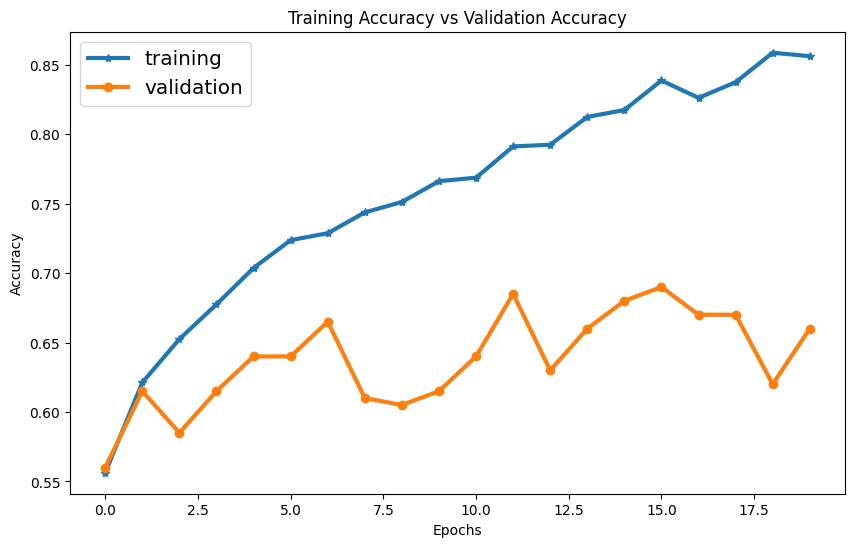

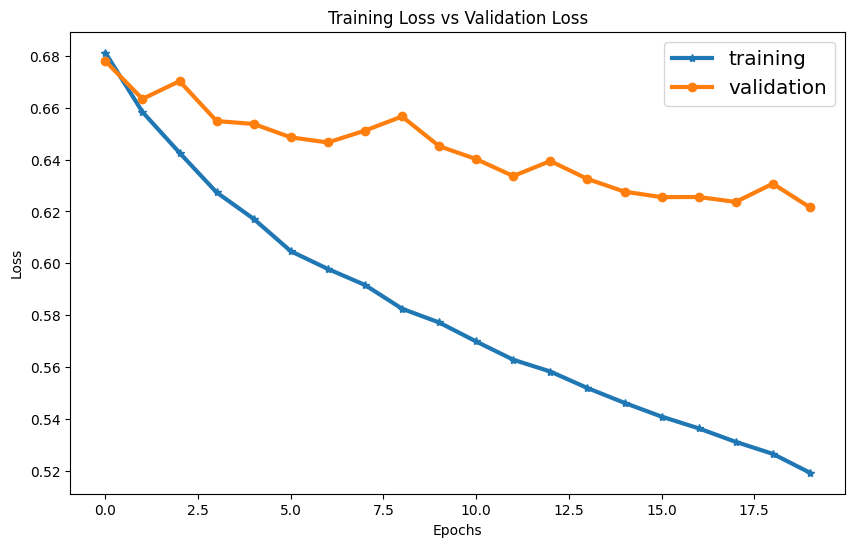

In [347]:


def visualize_training(history, lw = 3):
    plt.figure(figsize=(10,6))
    plt.plot(history.history['accuracy'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(history.history['val_accuracy'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Training Accuracy vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(fontsize = 'x-large')
    plt.show()

    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(history.history['val_loss'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Training Loss vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(fontsize = 'x-large')
    plt.show()


visualize_training(history)

## Demonstrate the False-Predict Images

Wrong prediction on these images
Customized VGG16 Training Size (128, 128) (Top)
Customized VGG16 Original Size (512, 512) (Bottom)


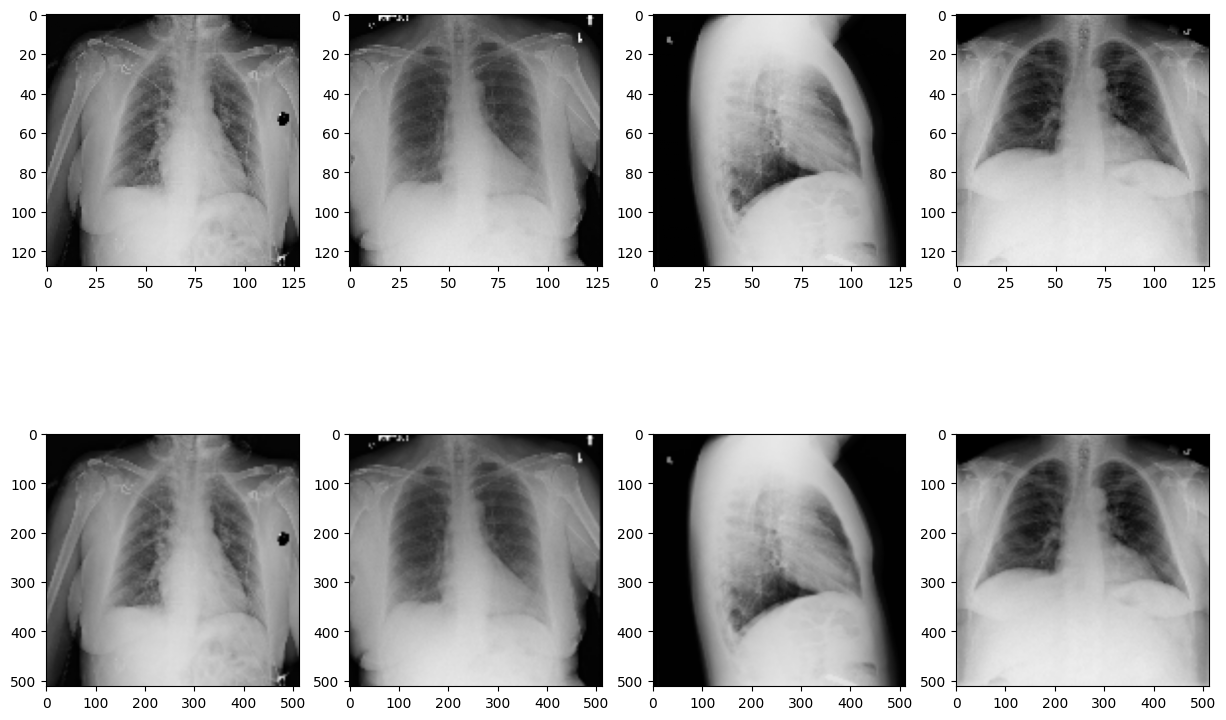

In [377]:
predrwrong = np.where(predr[:,0]!=test_image_label[:,1])
print('Wrong prediction on these images')
print('Customized VGG16 Training Size (128, 128) (Top)')
print('Customized VGG16 Original Size (512, 512) (Bottom)')
plt.figure(figsize = (15,10))
plt.subplot(2,4,1)
plt.imshow(test_images[predrwrong[0][0],:,:,:])
plt.subplot(2,4,2)
plt.imshow(test_images[predrwrong[0][1],:,:,:])
plt.subplot(2,4,3)
plt.imshow(test_images[predrwrong[0][2],:,:,:])
plt.subplot(2,4,4)
plt.imshow(test_images[predrwrong[0][3],:,:,:])
plt.subplot(2,4,5)
plt.imshow(cv2.resize(test_images[predrwrong[0][0],:,:,:]*255.0, (512,512)).astype('int32'))
plt.subplot(2,4,6)
plt.imshow(cv2.resize(test_images[predrwrong[0][1],:,:,:]*255.0, (512,512)).astype('int32'))
plt.subplot(2,4,7)
plt.imshow(cv2.resize(test_images[predrwrong[0][2],:,:,:]*255.0, (512,512)).astype('int32'))
plt.subplot(2,4,8)
plt.imshow(cv2.resize(test_images[predrwrong[0][3],:,:,:]*255.0, (512,512)).astype('int32'))
plt.show()

In [618]:
vec_list = []
for i in range(len(predrwrong[0])):
    tpred = Reduce_VGG_model.predict(test_images[predrwrong[0][i]].reshape(1,48,48,3))[0]
    tpred = np.round(tpred, 4)
    vec_list.append(tpred)
rtpred = vec_list

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [636]:
for i in range(len(predrwrong[0])):
    print('Incorrect Image: {}, Pi(0): {:.4f}, Pi(1): {:.4f}, and True Label {:.0f}.'.format(predrwrong[0][i], rtpred[i][0], rtpred[i][1],int(test_image_label[predrwrong[0][i], 1])))

Incorrect Image: 11, Pi(0): 0.5032, Pi(1): 0.4968, and True Label 1.
Incorrect Image: 18, Pi(0): 0.3915, Pi(1): 0.6085, and True Label 0.
Incorrect Image: 31, Pi(0): 0.6462, Pi(1): 0.3538, and True Label 1.
Incorrect Image: 69, Pi(0): 0.5217, Pi(1): 0.4783, and True Label 1.
Incorrect Image: 77, Pi(0): 0.3583, Pi(1): 0.6417, and True Label 0.
Incorrect Image: 107, Pi(0): 0.6423, Pi(1): 0.3577, and True Label 1.
Incorrect Image: 154, Pi(0): 0.5108, Pi(1): 0.4892, and True Label 1.
Incorrect Image: 257, Pi(0): 0.6462, Pi(1): 0.3538, and True Label 1.
Incorrect Image: 267, Pi(0): 0.6144, Pi(1): 0.3856, and True Label 1.
Incorrect Image: 287, Pi(0): 0.4522, Pi(1): 0.5478, and True Label 0.
Incorrect Image: 347, Pi(0): 0.5019, Pi(1): 0.4981, and True Label 1.


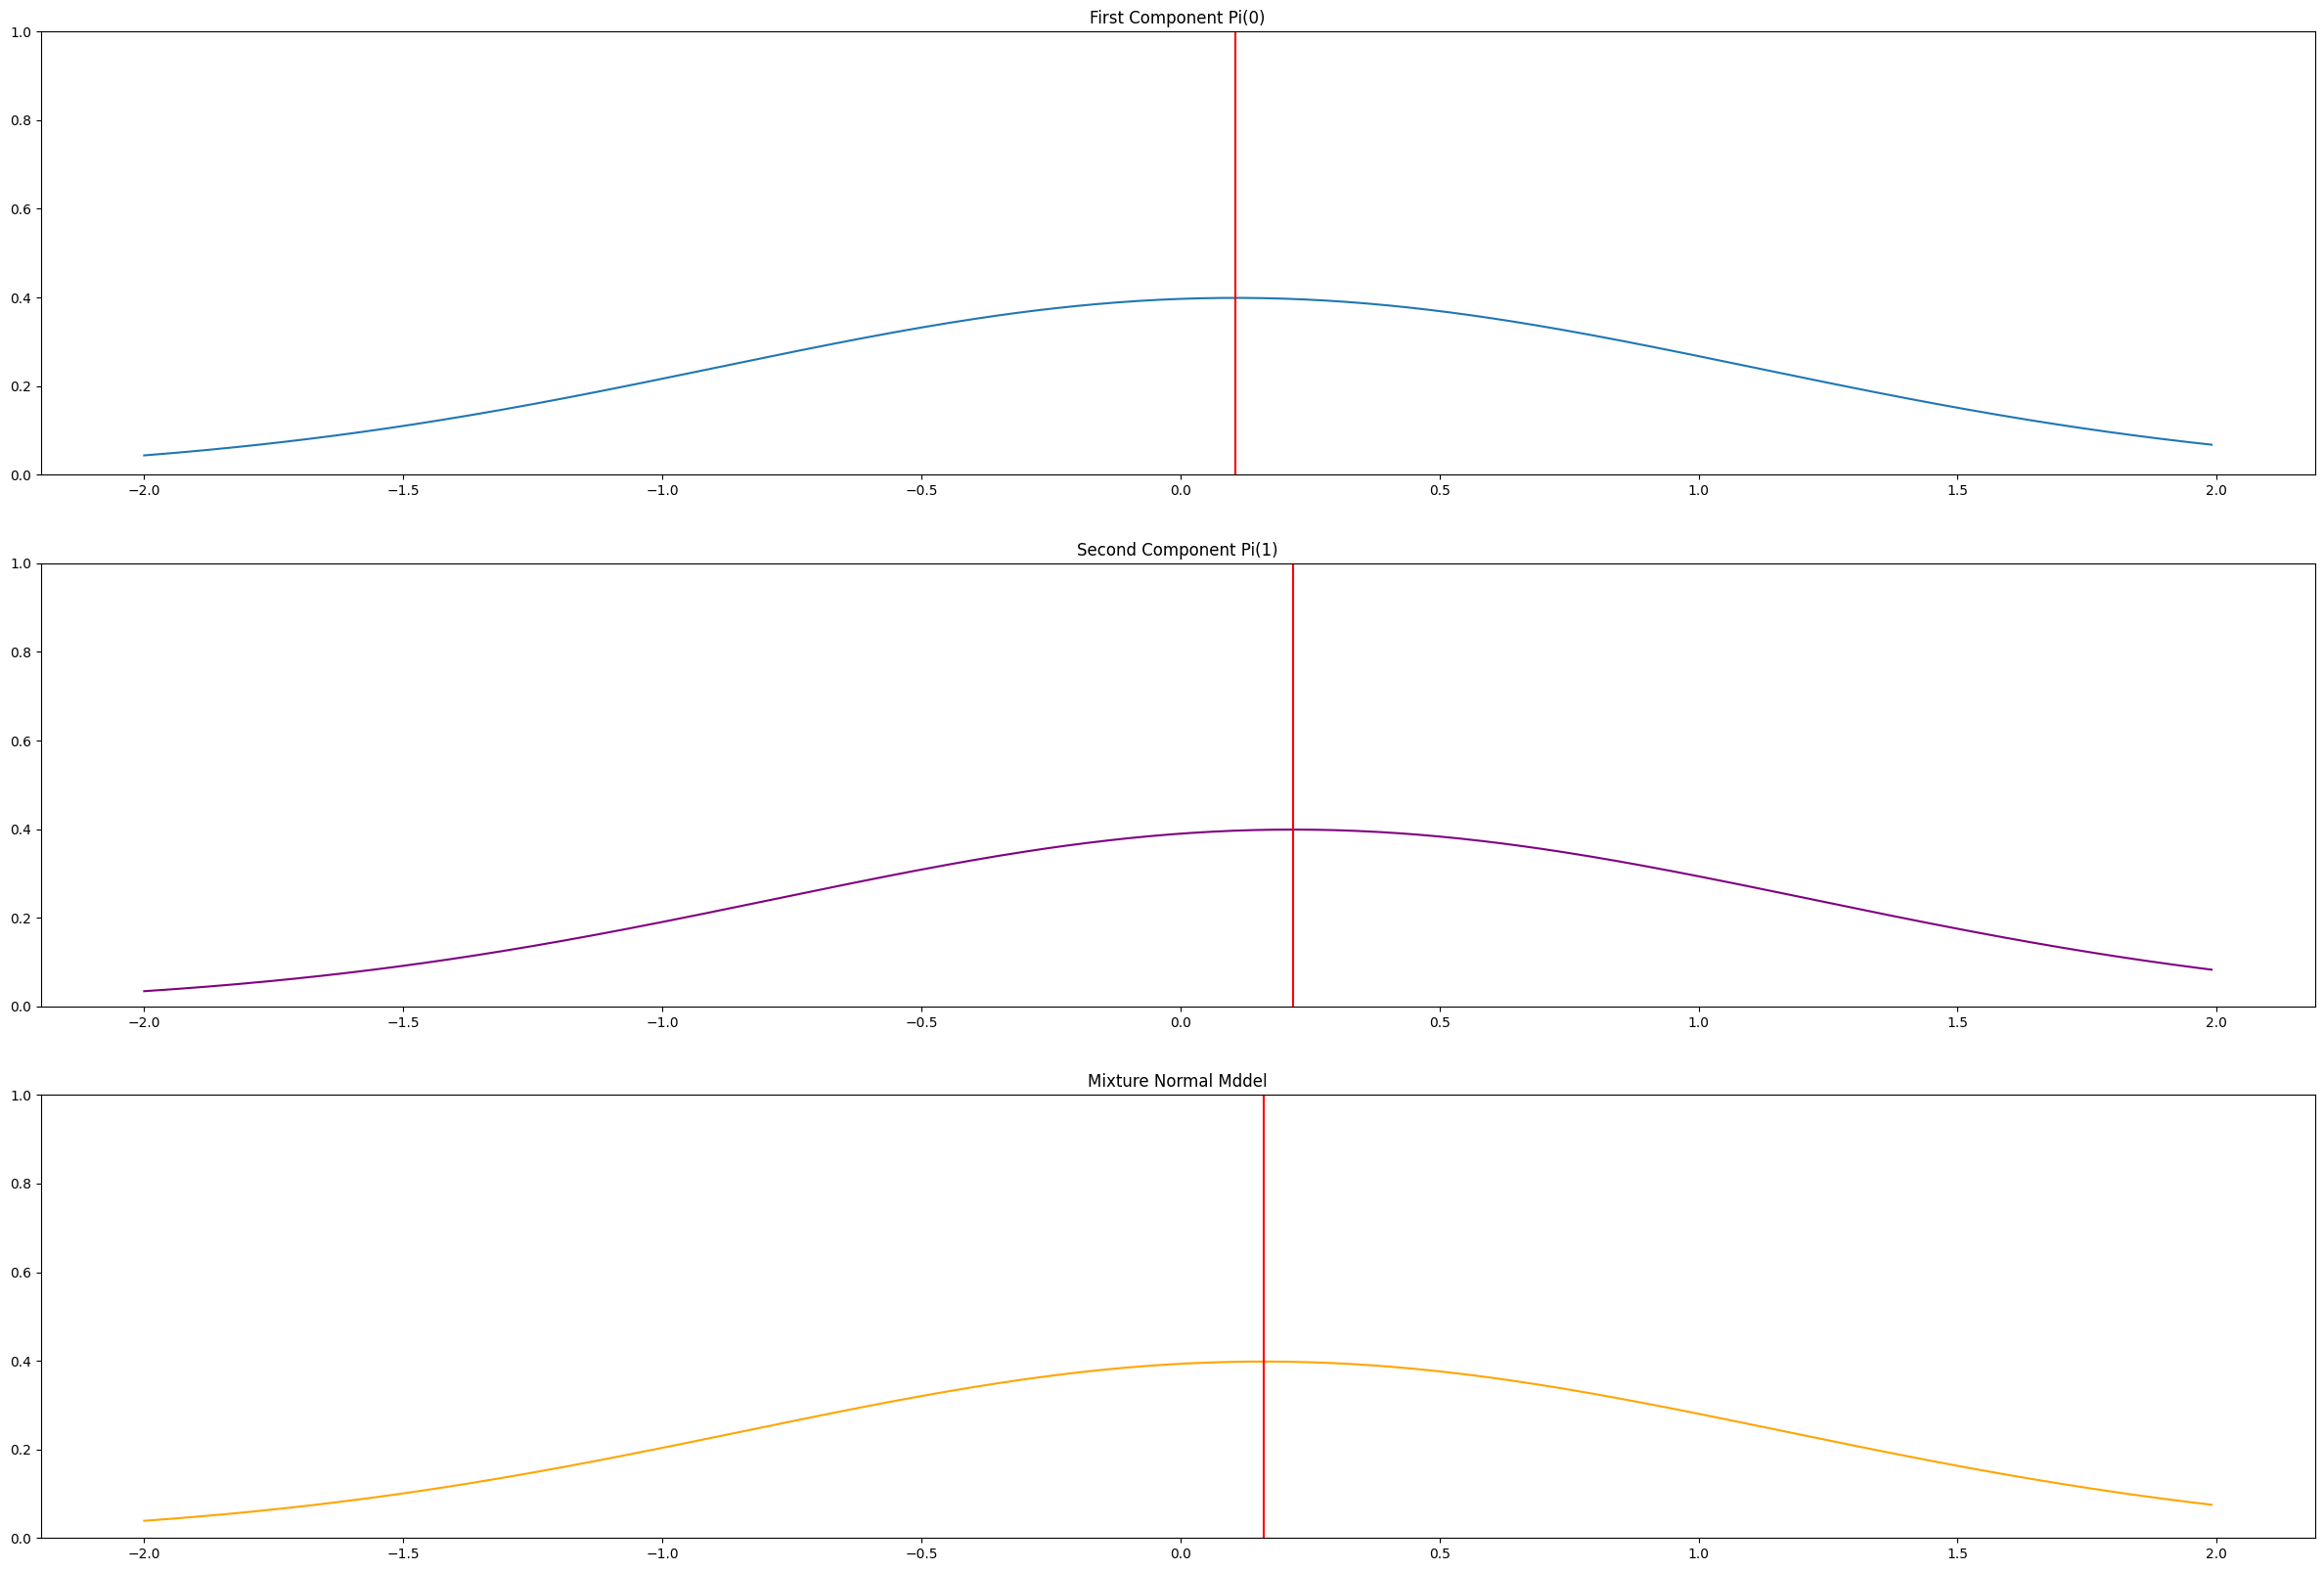

In [670]:
error_index = 0
plt.figure(figsize = (30,20))
plt.subplot(3,1,1)
plt.plot(np.arange(-2, 2, 0.01), norm.pdf(np.arange(-2, 2, 0.01), rtpred[error_index][2], np.exp(rtpred[error_index][4])))
plt.ylim(0,1)
plt.axvline(x=rtpred[error_index][2], ymin=0, ymax=1, c = 'red')
plt.title('First Component Pi(0)')
plt.subplot(3,1,2)
plt.plot(np.arange(-2, 2, 0.01), norm.pdf(np.arange(-2, 2, 0.01), rtpred[error_index][3], np.exp(rtpred[error_index][5])), c = 'purple')
plt.ylim(0,1)
plt.axvline(x=rtpred[error_index][3], ymin=0, ymax=1, c = 'red')
plt.title('Second Component Pi(1)')
plt.subplot(3,1,3)
ymix = rtpred[error_index][0]*norm.pdf(np.arange(-2, 2, 0.01), rtpred[error_index][2], np.exp(rtpred[error_index][4])) + rtpred[error_index][1]*norm.pdf(np.arange(-2, 2, 0.01), rtpred[error_index][3], np.exp(rtpred[error_index][5]))
plt.plot(np.arange(-2, 2, 0.01), ymix, c = 'orange')
plt.ylim(0,1)
plt.axvline(x=rtpred[error_index][0] * rtpred[error_index][2] + rtpred[error_index][1] * rtpred[error_index][3], ymin=0, ymax=1, c = 'red')
plt.title('Mixture Normal Mddel')
plt.show()